<a href="https://colab.research.google.com/github/KevinCantrell/ScienceAndScienceFiction/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf  # For deep learning and model handling
from tensorflow.keras import layers, models
import numpy as np  # For numerical operations
import cv2  # OpenCV for image processing (not used in this script, but commonly included)
import matplotlib.pyplot as plt  # For displaying images and plots
import PIL.Image  # For handling image operations
import ipywidgets as widgets  # For interactive widgets (not used in this script)
from google.colab import output, files  # For handling Colab-specific input/output
from base64 import b64decode  # For decoding image data from Base64 format
import io  # For handling in-memory binary data
from IPython.display import display, HTML  # For displaying HTML content in Colab

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


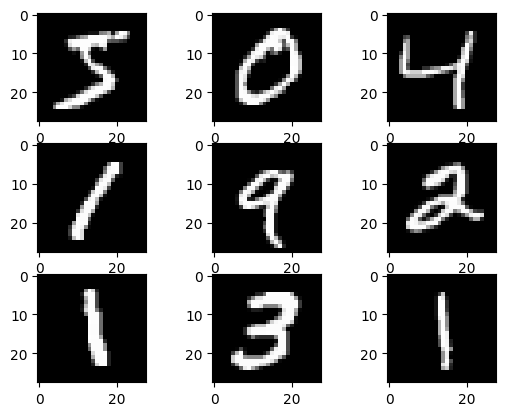

In [ ]:
# -------------------------------
# 🔹 Load & Prepare MNIST Dataset
# -------------------------------

# Load the MNIST dataset, which contains handwritten digits from 0-9.
# The dataset is split into a training set and a test set.
mnist = tf.keras.datasets.mnist

# Load both the training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to a range between 0 and 1 by dividing by 255
# MNIST images originally have pixel values between 0 and 255
x_train = x_train / 255.0  # Scaling pixel values to range [0, 1]
x_test = x_test / 255.0    # Scaling pixel values for test data

# ---------------------------------
# 🔹 Define & Train a Simple Model
# ---------------------------------

# Define a simple Convolutional Neural Network (CNN) model using Keras.
# CNNs are particularly good at image classification tasks like MNIST.
# summarize loaded dataset

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

We are using a [convolutional neural network](https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard).  This type of [neural network](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) is good at finding patterns in images.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

    # Reshape the input from (28, 28) to (28, 28, 1) to explicitly specify one color channel (grayscale)
    tf.keras.layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),

    # Convolutional layer:
    # - 16 filters (feature detectors) of size 3x3
    # - 'relu' activation function (ReLU helps introduce non-linearity)
    # - Extracts features from the input image
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),

    # Max Pooling layer:
    # - Reduces the spatial dimensions by taking the maximum value in each 2x2 window
    # - Helps downsample the feature maps, making computation more efficient
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten layer:
    # - Converts the 2D feature maps into a 1D vector
    # - Prepares the data for the dense (fully connected) layer
    tf.keras.layers.Flatten(),

    # Fully connected (Dense) output layer:
    # - 10 neurons (one for each digit, assuming classification of digits 0-9)
    # - 'softmax' activation function:
    #   - Converts the outputs into probabilities summing to 1
    #   - Helps classify the input into one of the 10 categories
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print a summary of the model structure, showing each layer's details
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          27,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    # Input layer: Reshape the image to have a single color channel
    layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),

    # Convolutional layer 1: Learn 32 filters of size 3x3
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

    # MaxPooling layer 1: Downsample the image
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2: Learn 64 filters of size 3x3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    # MaxPooling layer 2: Downsample again
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D output to 1D
    layers.Flatten(),

    # Fully connected layer: Dense layer with 128 units
    layers.Dense(128, activation='relu'),

    # Output layer: 10 units (one for each digit), with softmax activation for classification
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model:
# The 'adam' optimizer is used, which is an efficient optimization algorithm.
# The loss function is 'sparse_categorical_crossentropy', which is suitable for multi-class classification.
# We are tracking the 'accuracy' metric to evaluate the model performance.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model:
# Use the training data to train the model for 10 epochs.
# The model will learn to classify digits in the MNIST dataset.
# `verbose=1` shows detailed progress during training (including loss and accuracy per epoch).
model.fit(x_train, y_train, epochs=3, verbose=1, validation_split=0.2)  # Using test set for validation during training

# ---------------------------------
# 🔹 Evaluate the Model on Test Data
# ---------------------------------

# After training, evaluate the model on the test data to check how well it performs on unseen data.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy and loss
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 49ms/step - accuracy: 0.9006 - loss: 0.3167 - val_accuracy: 0.9840 - val_loss: 0.0577
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9859 - loss: 0.0477 - val_accuracy: 0.9854 - val_loss: 0.0497
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 51ms/step - accuracy: 0.9903 - loss: 0.0296 - val_accuracy: 0.9887 - val_loss: 0.0398
313/313 - 5s - 16ms/step - accuracy: 0.9891 - loss: 0.0340
Test accuracy: 0.9890999794006348
Test loss: 0.03396881744265556


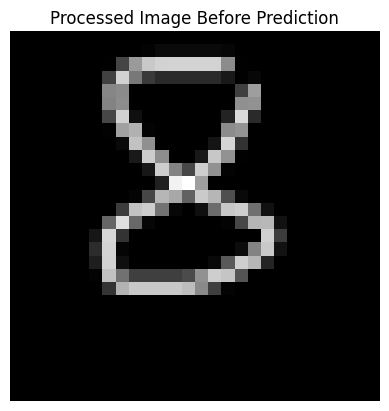

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted digit: 4
Probability of 0: 0.0152
Probability of 1: 0.0019
Probability of 2: 0.0315
Probability of 3: 0.3798
Probability of 4: 0.4560
Probability of 5: 0.0510
Probability of 6: 0.0461
Probability of 7: 0.0078
Probability of 8: 0.0103
Probability of 9: 0.0003


In [ ]:
# -------------------------------
# 🔹 JavaScript-Based Drawing Tool
# -------------------------------

canvas_html = """
<canvas id="canvas" width="280" height="280" style="border:1px solid;"></canvas>
<button onclick="upload()">Predict</button>
<script>
  // Get the drawing canvas and context
  let canvas = document.getElementById("canvas");
  let ctx = canvas.getContext("2d");

  // Set background color to black (since MNIST uses white digits on black)
  ctx.fillStyle = "black";
  ctx.fillRect(0, 0, canvas.width, canvas.height);

  // Variable to track if the user is drawing
  let drawing = false;

  // Mouse event listeners for drawing
  canvas.addEventListener("mousedown", () => drawing = true);  // Start drawing
  canvas.addEventListener("mouseup", () => { drawing = false; ctx.beginPath(); });  // Stop drawing
  canvas.addEventListener("mousemove", draw);  // Call 'draw' function when moving mouse

  function draw(e) {
    if (!drawing) return;  // If not drawing, exit function

    ctx.lineWidth = 10;  // Set brush thickness

    ctx.strokeStyle = "white";  // Draw in white (like MNIST digits)

    ctx.lineTo(e.offsetX, e.offsetY);  // Draw to current mouse position
    ctx.stroke();  // Apply stroke

    ctx.beginPath();  // Reset path to avoid connecting separate strokes
    ctx.moveTo(e.offsetX, e.offsetY);  // Move path to current position
  }

  // Upload function triggered when "Predict" button is clicked
  function upload() {
    let dataURL = canvas.toDataURL("image/png");  // Convert canvas to image data (Base64 PNG)
    google.colab.kernel.invokeFunction("notebook.upload_image", [dataURL], {});  // Send to Colab
  }
</script>
"""

# Display the drawing canvas in Colab
display(HTML(canvas_html))

# -------------------------------
# 🔹 Image Processing & Prediction
# -------------------------------

def predict_digit(image_data):
    # Decode the uploaded image data
    image = PIL.Image.open(io.BytesIO(image_data)).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to match MNIST input size
    image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
    image = image.reshape(1, 28, 28)  # Reshape to the required input shape for the model

    # Display the processed image before making a prediction
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title("Processed Image Before Prediction")
    plt.axis('off')
    plt.show()

    # Make the prediction
    prediction = model.predict(image)

    # Get the predicted digit (highest probability)
    predicted_digit = np.argmax(prediction)

    # Get probabilities for all digits
    probabilities = prediction[0]

    # Print the predicted digit
    print(f"Predicted digit: {predicted_digit}")

    # Print the probabilities for all digits
    for i in range(10):
        print(f"Probability of {i}: {probabilities[i]:.4f}")

# -------------------------------
# 🔹 Handling Image Upload from Canvas
# -------------------------------

def upload_image(dataURL):
    """Decodes the Base64 image and sends it to the prediction function."""

    # Extract and decode the Base64-encoded image data
    header, encoded = dataURL.split(",", 1)  # Remove header metadata
    image_data = b64decode(encoded)  # Convert from Base64 to binary data

    # Process the image and predict the digit
    predict_digit(image_data)

# Register the upload function as a callback in Google Colab
output.register_callback("notebook.upload_image", upload_image)